In [1]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import scanpy as sc;
import pandas as pd
import scipy
import numpy as np
import cython
from fa2 import ForceAtlas2

results_file = 'subset_myeloid_add.h5ad'
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=300, frameon=False)


In [2]:
from fa2 import ForceAtlas2

In [3]:
myeloid_ad = sc.read_h5ad('subset_myeloid_ann.h5ad')

In [4]:
sc.pp.neighbors(myeloid_ad, n_neighbors = 50, n_pcs = 20, knn = True, random_state = 10, method = "umap", use_rep='X_harmony')

computing neighbors
    finished (0:00:20.19) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


running PAGA
    finished (0:00:01.26) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
--> added 'pos', the PAGA positions (adata.uns['paga'])


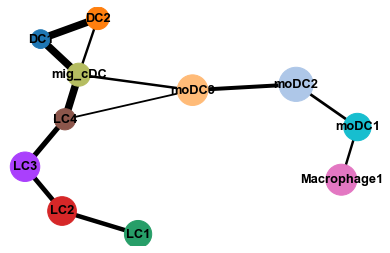

<Figure size 432x288 with 0 Axes>

In [5]:
myeloid_ad_PAGA = myeloid_ad[myeloid_ad.obs['combined'].isin(['Macrophage1','moDC1','moDC2','moDC3','LC1','LC2','LC3','LC4','DC1','DC2','mig_cDC'])]
sc.tl.paga(myeloid_ad_PAGA, groups='combined')
plot=sc.pl.paga(myeloid_ad_PAGA, color=['combined'], threshold=0.18, node_size_scale=5, edge_width_scale= 1)
plt.savefig('PAGA.png',dpi=300)

--> added 'pos', the PAGA positions (adata.uns['paga'])
saving figure to file ./figures/pagalabelled_mouse_DC2.png


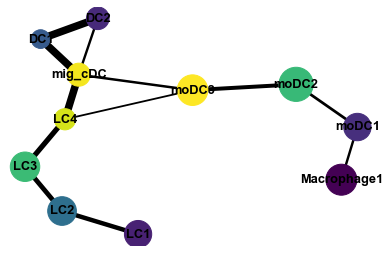

In [19]:
sc.pl.paga(myeloid_ad_PAGA, color=['mouse_CCR71'], threshold=0.18, node_size_scale=5, edge_width_scale= 1, save='labelled_mouse_DC2.png', labels=None)

--> added 'pos', the PAGA positions (adata.uns['paga'])
saving figure to file ./figures/pagalabelled_mouse_DC1.png


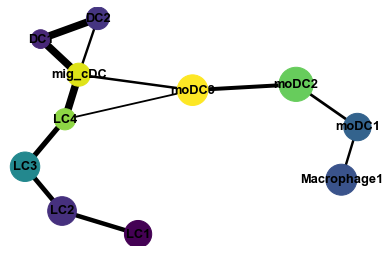

In [16]:
sc.pl.paga(myeloid_ad_PAGA, color=['mouse_DC11'], threshold=0.18, node_size_scale=5, edge_width_scale= 1, save='labelled_mouse_DC1.png')

In [11]:

new_colors = np.array(myeloid_ad_PAGA.uns['combined_colors'])
#CCR7 - 
new_colors[[0]] = '#e07b91'  # DC1
new_colors[[1]] = '#e99ec5'  # DC2
new_colors[[2]] = '#84b3e4'  # LC1
new_colors[[3]] = '#3e7de0'  # LC2
new_colors[[4]] = '#b6bbdf'  # LC3
new_colors[[5]] = '#7d87b9'  # LC4
new_colors[[6]] = '#d33d6a' #Macrophage1
new_colors[[7]] = '#f4c3dc' #mig_cDC
new_colors[[8]] = '#64c5e4'  # moDC_1
new_colors[[9]] = '#47b9b4'  # moDC_2
new_colors[[10]] = '#a0d5d1'  # moDC_3

myeloid_ad_PAGA.uns['combined_colors'] = new_colors



--> added 'pos', the PAGA positions (adata.uns['paga'])
saving figure to file ./figures/paga_labelled.png


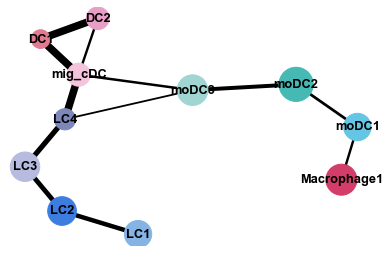

In [13]:
plot = sc.pl.paga(myeloid_ad_PAGA, color=['combined'], threshold=0.18, node_size_scale=5, edge_width_scale= 1, save='_labelled.png')